# Desafio técnico Seazone - Analise exploratória das planilhas
## Candidato: Marcos Vinícius Silva
A analise exploratória de dados tem o objetivo de explorar ao máximos os dados obtidos com o objetivo de gerar insights e encontrar inconsistência nos dados

## Import de bibliotecas e planilhas
Nessa etapa importamos as bibliotecas utilizadas, `Pandas`, `MatplotLib` e `Numpy`. Além disso, também fazemos uma amostragem básica das colunas para identificarmos tipos e termos uma visão geral do que estamos em mãos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
url_listaImoveis = '/content/listaImoveis.csv'
url_auxiliar = '/content/auxiliar.csv'
url_pipe2 = '/content/pipe2.csv'
url_planilhaFornecedor = '/content/planilhaFornecedor.csv'

In [ ]:
df_listaImoveis = pd.read_csv(url_listaImoveis)
df_auxiliar = pd.read_csv(url_auxiliar)
df_pipe2 = pd.read_csv(url_pipe2)
df_fornecedor = pd.read_csv(url_planilhaFornecedor)

In [ ]:
df_listaImoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 4117 non-null   object 
 1   Created At           4117 non-null   object 
 2   Single Bed Quantity  4102 non-null   float64
 3   Double Bed Quantity  4102 non-null   float64
 4   Pillow Quantity      4072 non-null   float64
 5   Bathroom Quantity    4102 non-null   float64
 6   Guest Capacity       4102 non-null   float64
 7   Property Type        4117 non-null   object 
 8   Status               4117 non-null   object 
 9   Activation Date      3837 non-null   object 
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(5), object(6)
memory usage: 353.9+ KB


In [ ]:
df_auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Item da Muda  9 non-null      object
 1   Calculo       8 non-null      object
dtypes: object(2)
memory usage: 292.0+ bytes


In [ ]:
df_pipe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Título             145 non-null    object
 1   Fase atual         145 non-null    object
 2   Criador            145 non-null    object
 3   Finalizado em      145 non-null    object
 4   Criado em          145 non-null    object
 5   Último comentário  144 non-null    object
dtypes: object(6)
memory usage: 6.9+ KB


In [ ]:
df_fornecedor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DATA                                                   767 non-null    object 
 1   ÁREA responsável                                       94 non-null     object 
 2   ID Imóvel                                              1033 non-null   object 
 3   Muda                                                   957 non-null    float64
 4   Status do Pagamento                                    647 non-null    object 
 5   Status da Entrega                                      513 non-null    object 
 6   Seazone enviou Cotação p/Fornec.                       963 non-null    object 
 7   Fornecedor retornou cotação e link de pagto p/Seazone  940 non-null    object 
 8   Prop. (pagou)                                   

## Analise 1: dados duplicados
Primeiramente vamos considerar na planilha `listaImoveis`, com todos os imóveis, que a coluna `Code` é um identificador único.
Para isso vamos entender no dataset se temos **Valores repetidos** nessa coluna e analisar se esse dado é confiável ou não.

1. Primeiro verificamos quantas linhas temos no df, `4117`
2. Após isso verificamos o numero de valores unicos da coluna Code, `3956`
3. Identificamos então `161 linhas` que possuem valores de codigo repetidos

In [ ]:
df_listaImoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 4117 non-null   object 
 1   Created At           4117 non-null   object 
 2   Single Bed Quantity  4102 non-null   float64
 3   Double Bed Quantity  4102 non-null   float64
 4   Pillow Quantity      4072 non-null   float64
 5   Bathroom Quantity    4102 non-null   float64
 6   Guest Capacity       4102 non-null   float64
 7   Property Type        4117 non-null   object 
 8   Status               4117 non-null   object 
 9   Activation Date      3837 non-null   object 
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(5), object(6)
memory usage: 353.9+ KB


In [ ]:
df_listaImoveis['Code'].nunique()

3956

In [ ]:
codigos_repetidos = df_listaImoveis['Code'].value_counts()
codigos_repetidos = codigos_repetidos[codigos_repetidos > 1]
print(f'Total de códigos com duplicatas: {len(codigos_repetidos)}')
print(f'Total de linhas com códigos duplicados: {codigos_repetidos.sum()}')


Total de códigos com duplicatas: 145
Total de linhas com códigos duplicados: 306


In [ ]:
codigos_repetidos.head()

,count
Code,
WTU004,4
KCW464,4
KCW155,3
MFT106,3
TQK0101,3


In [ ]:
df_listaImoveis[df_listaImoveis['Code']=='KCW464']

,Code,Created At,Single Bed Quantity,Double Bed Quantity,Pillow Quantity,Bathroom Quantity,Guest Capacity,Property Type,Status,Activation Date,Unnamed: 10
679,KCW464,2023-08-31T10:16:18.827653-03:00,1.0,0.0,5.0,1.0,3.0,Hotel,Inactive,31/08/2023,NaN
2352,KCW464,2026-01-03T00:00:00-03:00,0.0,0.0,3.0,1.0,3.0,Hotel,Inactive,01/08/2023,NaN
2632,KCW464,2023-07-31T16:18:30.155351-03:00,0.0,0.0,NaN,1.0,2.0,Apartment,Inactive,01/08/2023,NaN
3840,KCW464,2020-06-09T00:00:00-03:00,0.0,0.0,0.0,0.0,3.0,Hotel,Inactive,09/06/2020,NaN


In [ ]:
df_listaImoveis[df_listaImoveis['Code']=='WTU004']

,Code,Created At,Single Bed Quantity,Double Bed Quantity,Pillow Quantity,Bathroom Quantity,Guest Capacity,Property Type,Status,Activation Date,Unnamed: 10
258,WTU004,2025-01-31T15:11:02.174005-03:00,1.0,0.0,5.0,1.0,3.0,Apartment,Inactive,02/02/2025,NaN
2615,WTU004,2024-07-01T15:00:04.549971-03:00,1.0,0.0,0.0,1.0,3.0,Apartment,Inactive,02/07/2024,NaN
3483,WTU004,2024-03-27T21:00:00-03:00,1.0,0.0,3.0,1.0,3.0,House,Inactive,03/06/2022,NaN
3818,WTU004,2025-07-09T18:07:05.236764-03:00,NaN,NaN,NaN,NaN,NaN,Apartment,Inactive,01/07/2025,NaN


### Conclusão
Foram encontradas inconsistências relacionadas a coluna de Code da planilha:
- Existem valores de identificador único repetidos
- As informações relacionadas a esses valores únicos não são iguais em todas as linhas, gerando gaps e anulando a confiabilidade do dado

## Analise 2: Colunas de camas
A partir de agora vamos analisar a planilha unificada com o nome do candidato, no caso meu nome rsrs. É necessário saber que:
- Todos os dados foram captados das outras planilhas (listaImovel, pipe2 e planilha Fornecedor)
- os cálculos dos itens de enxoval foram feitos com base na planilha auxiliar

A analise abaixo tem o objetivo de verificar inconsistências nos dados com base na coluna de camas (single bed e double bed)

In [ ]:
url_unificada = '/content/MarcosVinicius - Marcos Vinicius.csv'

df_unificado = pd.read_csv(url_unificada)



df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  4153 non-null   object 
 1   id_imovel             3946 non-null   object 
 2   Single Bed Quantity   3942 non-null   float64
 3   Double Bed Quantity   3942 non-null   float64
 4   Pillow Quantity       3914 non-null   float64
 5   Bathroom Quantity     3942 non-null   float64
 6   Guest Capacity        3942 non-null   float64
 7   toalha de rosto       3942 non-null   float64
 8   Toalha de piso        3942 non-null   float64
 9   Toalha de banho       3942 non-null   float64
 10  Lençol solteiro       3942 non-null   float64
 11  Lençol casal          3942 non-null   float64
 12  Fronha                3946 non-null   float64
 13  Edredom solteiro      3942 non-null   float64
 14  Edredom casal         3942 non-null   float64
 15  Muda                 

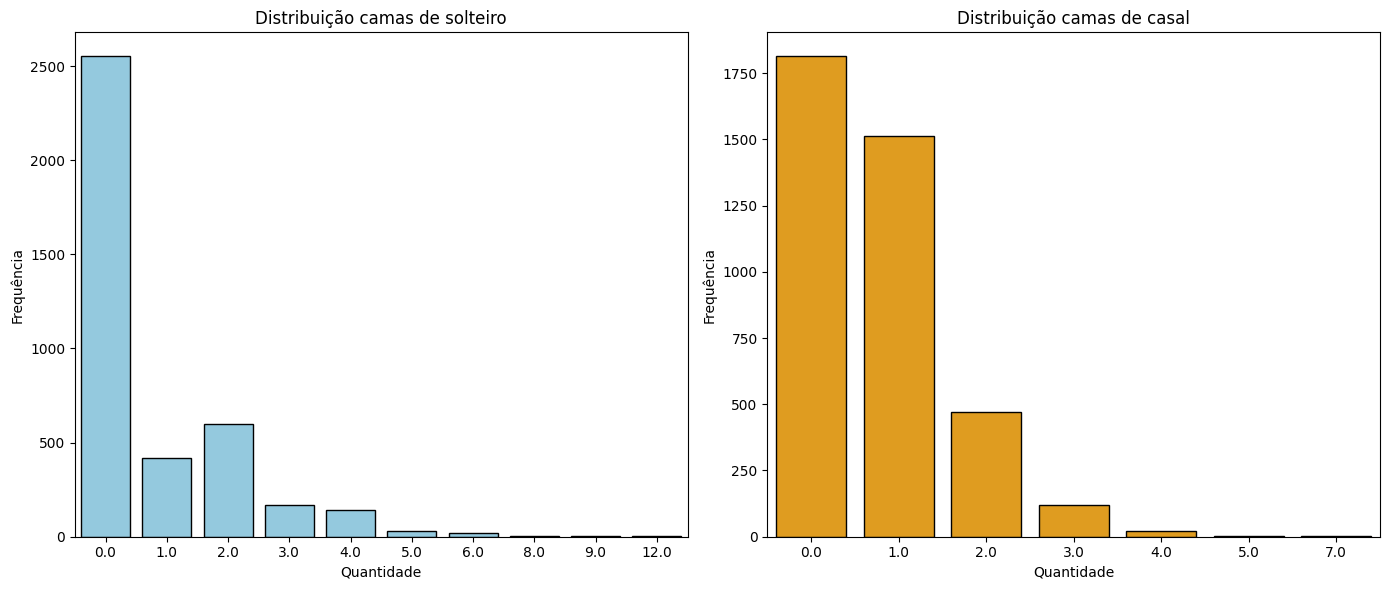

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x="Single Bed Quantity", data=df_unificado, ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_title("Distribuição camas de solteiro")
axs[0].set_xlabel("Quantidade")
axs[0].set_ylabel("Frequência")


sns.countplot(x="Double Bed Quantity", data=df_unificado, ax=axs[1], color='orange', edgecolor='black')
axs[1].set_title("Distribuição camas de casal")
axs[1].set_xlabel("Quantidade")
axs[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()


### O que podemos analisar?
- Imóveis com 0 camas de solteiro ou 0 de casal, isso é esperado?
  - Sim, considerando que um quarto pode ter **ou** cama de solteiro **ou** cama de casal, mas a pergunta que fica é, será que existe algum dado com 0 cama de casal e solteiro?
---
Vamos para a analise:

In [ ]:
df_quartosVazios = df_unificado[(df_unificado['Single Bed Quantity'] == 0) & (df_unificado['Double Bed Quantity'] == 0) ]

print(f'Quantidade de linhas com quartos sem camas {len(df_quartosVazios)}')

df_quartosVazios.head(20)

Quantidade de linhas com quartos sem camas 1281


,Code,id_imovel,Single Bed Quantity,Double Bed Quantity,Pillow Quantity,Bathroom Quantity,Guest Capacity,toalha de rosto,Toalha de piso,Toalha de banho,Lençol solteiro,Lençol casal,Fronha,Edredom solteiro,Edredom casal,Muda,Status,Data atualização Fim
9,NIG1707,NIG1707,0.0,0.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,Inactive,Aguardando atualização
14,KTP0024,KTP0024,0.0,0.0,8.0,2.0,6.0,6.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,14.0,Inactive,Aguardando atualização
21,JMD4406,JMD4406,0.0,0.0,6.0,1.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,Inactive,Aguardando atualização
27,JMD3415,JMD3415,0.0,0.0,6.0,1.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,Active,Aguardando atualização
28,FEA0018,FEA0018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive,Aguardando atualização
30,UMWC0911,UMWC0911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive,Aguardando atualização
31,JMD1211,JMD1211,0.0,0.0,6.0,1.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,Active,Aguardando atualização
34,JMD2203,JMD2203,0.0,0.0,6.0,1.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,Inactive,Aguardando atualização
36,FEA0016,FEA0016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Inactive,Aguardando atualização
43,JMD3104,JMD3104,0.0,0.0,6.0,1.0,4.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,Inactive,Aguardando atualização


### Conclusão
- É possível identificar 1281 imóveis que não possuem cama de solteiro nem de Casal
- Esse dado viola o propósito principal da hospedagem e os dados merecem ser revisitados ou excluidos
---
## Inconsistencia na quantidade de camas e capacidade de pessoas
Agora, vamos verifica os imóveis com inconsistencias na quantidade de camas e capacidade de pessoas, como verificar isso?

_Guest Capacity = Cama de solteiro + 2 * Cama de casal_

In [ ]:
df_quartosGrandes = df_unificado[(df_unificado['Single Bed Quantity'] + 2 * df_unificado['Double Bed Quantity'] != df_unificado['Guest Capacity'])]
print(f'Quantidade de linhas com muitas camas {len(df_quartosGrandes)}')

df_quartosGrandes.sample(20)

Quantidade de linhas com muitas camas 2721


,Code,id_imovel,Single Bed Quantity,Double Bed Quantity,Pillow Quantity,Bathroom Quantity,Guest Capacity,toalha de rosto,Toalha de piso,Toalha de banho,Lençol solteiro,Lençol casal,Fronha,Edredom solteiro,Edredom casal,Muda,Status,Data atualização Fim
997,TWO0401,TWO0401,3.0,1.0,9.0,3.0,7.0,7.0,3.0,7.0,3.0,1.0,4.0,3.0,1.0,29.0,Inactive,Aguardando atualização
2192,SBF0126,SBF0126,0.0,1.0,12.0,2.0,6.0,6.0,2.0,6.0,0.0,1.0,1.0,0.0,1.0,17.0,Inactive,Aguardando atualização
87,KCW327,KCW327,1.0,0.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,14.0,Inactive,Aguardando atualização
3806,SGC001,SGC001,0.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,10.0,Inactive,Aguardando atualização
3094,DSV014,DSV014,4.0,0.0,10.0,3.0,6.0,6.0,3.0,6.0,4.0,0.0,4.0,4.0,0.0,27.0,Inactive,Aguardando atualização
4149,SFJ0206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3865,TBM204,TBM204,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,Inactive,Aguardando atualização
187,SHQ208,SHQ208,0.0,0.0,4.0,2.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,Inactive,Aguardando atualização
2154,SKV8302,SKV8302,2.0,0.0,6.0,2.0,6.0,6.0,2.0,6.0,2.0,0.0,2.0,2.0,0.0,20.0,Inactive,Aguardando atualização
1360,BUQ0009,BUQ0009,1.0,1.0,21.0,4.0,11.0,11.0,4.0,11.0,1.0,1.0,2.0,1.0,1.0,32.0,Inactive,Aguardando atualização


### Conclusão
- Há muitos dados no dataset que indicam inconsistencia de dados se a premissa de guest capacity estiver correta
- No total são 2721 quartos com dados inconsistentes deixando nosso dataset com `1433` linhas válidas

## Analise do perfil de imóves da planilha final

In [ ]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  4153 non-null   object 
 1   id_imovel             3946 non-null   object 
 2   Single Bed Quantity   3942 non-null   float64
 3   Double Bed Quantity   3942 non-null   float64
 4   Pillow Quantity       3914 non-null   float64
 5   Bathroom Quantity     3942 non-null   float64
 6   Guest Capacity        3942 non-null   float64
 7   toalha de rosto       3942 non-null   float64
 8   Toalha de piso        3942 non-null   float64
 9   Toalha de banho       3942 non-null   float64
 10  Lençol solteiro       3942 non-null   float64
 11  Lençol casal          3942 non-null   float64
 12  Fronha                3946 non-null   float64
 13  Edredom solteiro      3942 non-null   float64
 14  Edredom casal         3942 non-null   float64
 15  Muda                 

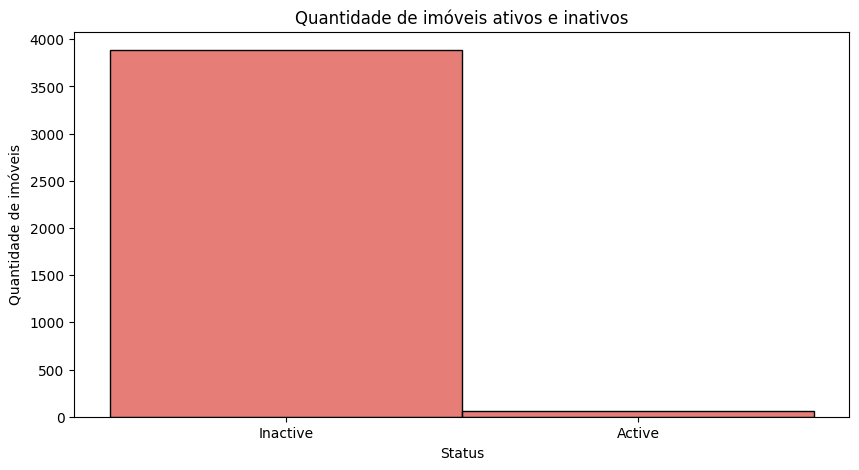

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Status', data=df_unificado, discrete=True, color='#DE534A')
plt.title("Quantidade de imóveis ativos e inativos")
plt.ylabel("Quantidade de imóveis")
plt.show()

In [ ]:
df_ativos = df_unificado[df_unificado['Status'] == 'Active']
df_ativos.reset_index(inplace=True)
print(f'Quantidade de imóveis ativos: {len(df_ativos)}')


Quantidade de imóveis ativos: 59


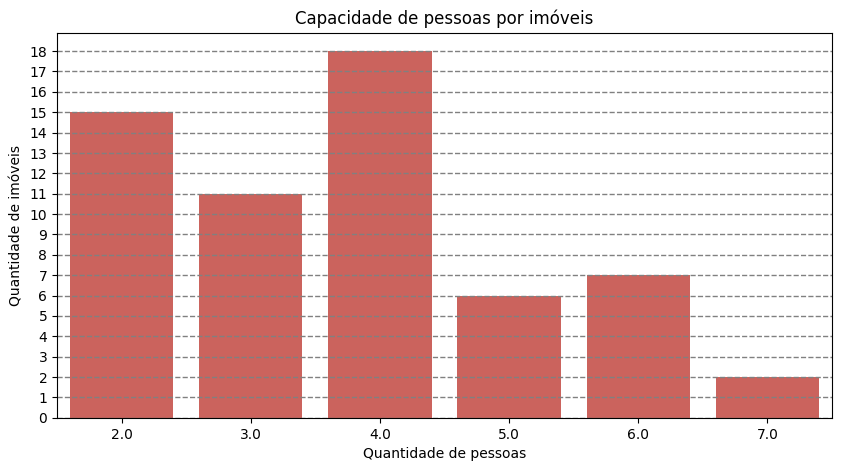

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Guest Capacity', data=df_ativos, color='#DE534A')
plt.title("Capacidade de pessoas por imóveis")
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Quantidade de imóveis")
plt.yticks(range(0, df_ativos["Guest Capacity"].value_counts().max() + 1, 1))
plt.grid(axis='y', linestyle='--', linewidth=1, color='gray')
plt.show()

In [ ]:
df =df_ativos[(df_ativos['Single Bed Quantity'] != 0) | (df_ativos['Double Bed Quantity']!=0)]
print(f'Quantidade de imóveis registrados com pelo menos um tipo de cama: {len(df)}')


# Lista dos itens de enxoval que você quer contabilizar
itens_enxoval = [
    "Pillow Quantity",
    "toalha de rosto",
    "Toalha de piso",
    "Toalha de banho",
    "Lençol solteiro",
    "Lençol casal",
    "Fronha",
    "Edredom solteiro",
    "Edredom casal"
]

print("=== Quantidade Total de Itens do Enxoval ===\n")

for item in itens_enxoval:
    total = df[item].sum()
    print(f"{item}: {int(total)}")


Quantidade de imóveis registrados com pelo menos um tipo de cama: 41
=== Quantidade Total de Itens do Enxoval ===

Pillow Quantity: 200
toalha de rosto: 160
Toalha de piso: 55
Toalha de banho: 160
Lençol solteiro: 38
Lençol casal: 40
Fronha: 78
Edredom solteiro: 38
Edredom casal: 40


In [ ]:
print("=== Perfil Geral dos Imóveis Ativos ===")
print(f"Total de imóveis ativos: {len(df)}")
print(f"Capacidade total de hóspedes: {int(df['Guest Capacity'].sum())}")
print(f"Camas de solteiro: {int(df['Single Bed Quantity'].sum())}")
print(f"Camas de casal: {int(df['Double Bed Quantity'].sum())}")
print(f"Banheiros totais: {int(df['Bathroom Quantity'].sum())}")


=== Perfil Geral dos Imóveis Ativos ===
Total de imóveis ativos: 41
Capacidade total de hóspedes: 160
Camas de solteiro: 38
Camas de casal: 40
Banheiros totais: 55


In [ ]:
print("\n=== Proporções por Hóspede (Médias) ===")
print(f"Travesseiros por hóspede: {df['Pillow Quantity'].sum() / df['Guest Capacity'].sum():.2f}")
print(f"Toalhas de banho por hóspede: {df['Toalha de banho'].sum() / df['Guest Capacity'].sum():.2f}")
print(f"Fronhas por hóspede: {df['Fronha'].sum() / df['Guest Capacity'].sum():.2f}")
print(f"Mudas por hóspede: {df['Muda'].sum() / df['Guest Capacity'].sum():.2f}")



=== Proporções por Hóspede (Médias) ===
Travesseiros por hóspede: 1.25
Toalhas de banho por hóspede: 1.00
Fronhas por hóspede: 0.49
Mudas por hóspede: 3.81


In [ ]:
total_camas = df['Single Bed Quantity'].sum() + df['Double Bed Quantity'].sum()

print("\n=== Checagem de Suficiência Básica ===")
print(f"Lençóis por cama: {(df['Lençol solteiro'].sum() + df['Lençol casal'].sum()) / total_camas:.2f}")
print(f"Edredons por cama: {(df['Edredom solteiro'].sum() + df['Edredom casal'].sum()) / total_camas:.2f}")
print(f"Fronhas por cama: {df['Fronha'].sum() / total_camas:.2f}")



=== Checagem de Suficiência Básica ===
Lençóis por cama: 1.00
Edredons por cama: 1.00
Fronhas por cama: 1.00


In [ ]:
print("\n=== Top 5 imóveis com maior capacidade ===")
top_capacity = df.sort_values(by='Guest Capacity', ascending=False).head(5)
print(top_capacity[['Code', 'Guest Capacity', 'Pillow Quantity', 'Toalha de banho']])



=== Top 5 imóveis com maior capacidade ===
       Code  Guest Capacity  Pillow Quantity  Toalha de banho
30  BQD2200             7.0              6.0              7.0
33  NPS0402             7.0              9.0              7.0
54  TIS5231             6.0             10.0              6.0
2    BZB201             6.0              6.0              6.0
56  QTND003             6.0              8.0              6.0
